In [1]:
import os
import glob
import re
import shutil
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [11]:
DEFAULT_THRESHOLD=0.5

In [12]:
pred=pd.read_csv("/mnt/idms/PROJECTS/Lung/LungCT/DSB2017/prediction.csv")
pred.rename(columns={'id': 'pid'}, inplace=True)
lab=pd.read_csv("/mnt/idms/PROJECTS/Lung/LungCT/DSB2017/LIDC-IDRI_statistics.csv")
merged=pred.merge(lab,on="pid")
merged.rename(columns={'cancer_x': 'pred', 'cancer_y': 'lab'}, inplace=True)
summary=merged[['pid','pred','lab']]
summary['pred_bool']=np.where(summary['pred']>DEFAULT_THRESHOLD,1,0)
summary.head(20)

/home/andor/anaconda3/envs/CT4/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,pid,pred,lab,pred_bool
0,LIDC-IDRI-0447,0.493740,1,0
1,LIDC-IDRI-0831,0.094139,0,0
2,LIDC-IDRI-0564,0.009712,0,0
3,LIDC-IDRI-0723,0.050270,1,0
4,LIDC-IDRI-0632,0.017658,0,0
5,LIDC-IDRI-0135,0.228096,1,0
6,LIDC-IDRI-0415,0.690610,1,1
7,LIDC-IDRI-0403,0.068024,0,0
8,LIDC-IDRI-0601,0.399131,1,0
9,LIDC-IDRI-0229,0.975891,1,1


In [13]:
correct=np.sum(summary['lab']==summary['pred_bool'])
case_cnt=len(summary)
print(f"There are {correct} correct predictions out of {case_cnt} CTs, giving {correct*100/case_cnt}% accuracy.")

There are 644 correct predictions out of 1005 CTs, giving 64.07960199004975% accuracy.


### ROC-AUC

The AUC is 0.8180306761754254.


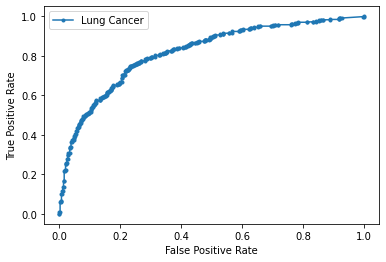

In [14]:
auc = roc_auc_score(summary['lab'], summary['pred'])
fpr, tpr, _ = roc_curve(summary['lab'], summary['pred'])
print(f"The AUC is {auc}.")
pyplot.plot(fpr, tpr, marker='.', label='Lung Cancer')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### Find best threshold

In [18]:
best_threshold=0
best_accuracy=0
for threshold in np.linspace(0,1,30):
    pred_bool=np.where(summary['pred']>threshold,1,0)
    correct=np.sum(summary['lab']==pred_bool)
    accuracy=correct*100/case_cnt
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_threshold=threshold
    print(f"With threshold={threshold},there are {correct}/{case_cnt} correct predictions, giving {accuracy}% accuracy.")

With threshold=0.0,there are 559/1005 correct predictions, giving 55.62189054726368% accuracy.
With threshold=0.034482758620689655,there are 671/1005 correct predictions, giving 66.76616915422886% accuracy.
With threshold=0.06896551724137931,there are 730/1005 correct predictions, giving 72.636815920398% accuracy.
With threshold=0.10344827586206896,there are 759/1005 correct predictions, giving 75.5223880597015% accuracy.
With threshold=0.13793103448275862,there are 745/1005 correct predictions, giving 74.12935323383084% accuracy.
With threshold=0.1724137931034483,there are 724/1005 correct predictions, giving 72.03980099502488% accuracy.
With threshold=0.20689655172413793,there are 713/1005 correct predictions, giving 70.94527363184079% accuracy.
With threshold=0.24137931034482757,there are 704/1005 correct predictions, giving 70.04975124378109% accuracy.
With threshold=0.27586206896551724,there are 692/1005 correct predictions, giving 68.85572139303483% accuracy.
With threshold=0.310

In [19]:
print(f"The best threshold is {best_threshold}, giving {best_accuracy}% accuracy")

The best threshold is 0.10344827586206896, giving 75.5223880597015% accuracy
